In [40]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import janitor


In [41]:
# Configurações para melhorar a visualização dos gráficos
plt.style.use("ggplot")  # Usando um estilo mais genérico
plt.rcParams["figure.figsize"] = (12, 8)

# Configuração adicional para melhorar a legibilidade
sns.set_context("notebook", font_scale=1.2)


#### Preenchimento/checagem dos valores dos índices e das pedras

##### INDE

O INDE (Índice de Desenvolvimento Educacional) é um índice composto que integra diversos outros indicadores para fornecer uma visão abrangente do desenvolvimento do estudante no programa da Passos Mágicos. Com base nos relatórios PEDE, vou explicar como o INDE é calculado:
Componentes do INDE:

- IDA (Índice de Desenvolvimento Acadêmico)
- IEG (Índice de Engajamento)
- IAA (Índice de Assiduidade e Adesão)
- IAN (Índice de Adequação de Nível)
- IPS (Índice Psicossocial)
- IPP (Índice de Potencial e Protagonismo)
- IPV (Índice de Presença Virtual) - adicionado a partir de 2020

- Cálculo do INDE:

- INDE relatório PEDE 2020 (p. 9):
> Fases 0 (ou alfa) a 7: (IDA * 0.20) + (IEG * 0.20) + (IAA * 0.10) + (IAN * 0.10) + (IPS * 0.10) + (IPP * 0.10) + (IPV * 0.20)
> Fase 8: (IDA * 0.40) + (IEG * 0.20) + (IAA * 0.10) + (IAN * 0.10) + (IPS * 0.20)

- INDE relatório PEDE 2021 (p. 9):
> Fases 0 (ou alfa) a 7: (IAN * 0.10) + (IDA * 0.20) + (IEG * 0.20) + (IAA * 0.10) +  (IPS * 0.10) + (IPP * 0.10) + (IPV * 0.20)
> Fase 8: (IAN * 0.10) + (IDA * 0.40) + (IEG * 0.20) + (IAA * 0.10) +  (IPS * 0.20) 

- INDE relatório PEDE 2022 (p. 8):
> Fases 0 (ou alfa) a 7: (IAN * 0.10) + (IDA * 0.20) + (IEG * 0.20) + (IAA * 0.10) +  (IPS * 0.10) + (IPP * 0.10) + (IPV * 0.20)
> Fase 8: (IAN * 0.10) + (IDA * 0.40) + (IEG * 0.20) + (IAA * 0.10) +  (IPS * 0.20) 

##### Pedras Conceito - substituiu o CONCEITO INDE (a coluna inde_conceito por ser eliminada):

As pedras conceito são classificações atribuídas aos estudantes com base em seu desempenho geral, principalmente no INDE. Existem quatro níveis, do mais alto para o mais baixo:

- Topázio
- Ametista
- Ágata
- Quartzo

Conforme o relatório PEDE 2022 (p. 71), as faixas aproximadas de INDE para cada pedra conceito são:

- Topázio: INDE de 8,2
- Ametista: INDE de 7,0
- Ágata: INDE de 5,2
- Quartzo: INDE de 3,1



# Carrega dos dados pré-processados

In [42]:
df_clean_0 = pd.read_parquet("data/data_clean_0.parquet").clean_names()
df_cleaned = (
    pd.read_parquet("data/data_pooled_0.parquet")
    .reset_index()
    .rename(columns={"index": "id"})
    .clean_names()
)


## Dados não-empilhados

In [43]:
df_clean_0.describe()


,idade_aluno_2020,anos_pm_2020,ponto_virada_2020,inde_2020,iaa_2020,ieg_2020,ips_2020,ida_2020,ipp_2020,ipv_2020,...,ida_2022,nota_port_2022,nota_mat_2022,nota_ing_2022,qtd_aval_2022,ipp_2022,indicado_bolsa_2022,ponto_virada_2022,ipv_2022,ian_2022
count,727.0,727.0,701.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,...,862.000000,860.000000,860.000000,285.000000,862.0,862.000000,862.000000,862.000000,862.000000,862.000000
mean,12.408528,1.467675,0.134094,7.296111,8.368882,7.681155,6.737448,6.322260,7.067859,7.242243,...,6.070688,5.796318,6.306628,5.839942,3.056845,6.299364,0.153132,0.131090,7.247953,6.421114
std,2.829807,1.131195,0.340997,1.199925,1.727980,2.382122,1.374011,2.960073,1.988054,1.775110,...,2.059346,2.422292,2.092551,2.992093,0.775806,1.135510,0.360324,0.337695,1.098548,2.387816
min,7.0,0.0,0.000000,3.065001,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.0,0.000000,0.000000,0.000000,2.500010,2.500000
25%,10.0,1.0,0.000000,6.569584,7.958350,6.600000,5.625000,4.666667,6.953125,6.916665,...,4.750000,4.316667,5.166667,3.500000,2.0,5.625000,0.000000,0.000000,6.722220,5.000000
50%,12.0,1.0,0.000000,7.580834,8.750010,8.500000,7.500000,7.000000,7.500000,7.583335,...,6.333333,6.000000,6.650000,6.266667,3.0,6.250000,0.000000,0.000000,7.333335,5.000000
75%,14.0,2.0,0.000000,8.178960,9.166680,9.500000,7.500000,8.666667,8.125000,8.055557,...,7.583333,7.833333,7.833333,8.500000,4.0,7.031250,0.000000,0.000000,7.916665,10.000000
max,20.0,4.0,1.000000,9.712504,10.000020,10.000000,10.000000,10.000000,10.000000,10.000010,...,9.916667,10.000000,10.000000,10.000000,4.0,9.218750,1.000000,1.000000,10.000010,10.000000


## Dados empilhados

In [44]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4044 entries, 0 to 4043
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        4044 non-null   int64   
 1   ano                       4044 non-null   int64   
 2   nome                      4044 non-null   string  
 3   instituicao_ensino_aluno  1413 non-null   object  
 4   idade_aluno               727 non-null    Int64   
 5   anos_pm                   727 non-null    Int64   
 6   ponto_virada              2247 non-null   float64 
 7   inde                      2273 non-null   float64 
 8   inde_conceito             727 non-null    category
 9   pedra                     2275 non-null   object  
 10  destaque_ieg              1589 non-null   string  
 11  destaque_ida              1589 non-null   string  
 12  destaque_ipv              1565 non-null   string  
 13  iaa                       2275 non-null   float6

In [45]:
# Contagem de valores para variáveis categóricas (não-nulos)
categorical_vars = [
    "ano",
    "instituicao_ensino_aluno",
    "inde_conceito",
    "pedra",
    "fase",
    "sinalizador_ingressante",
    "defasagem",
    "bolsista",
]
for var in categorical_vars:
    if var in df_cleaned.columns:
        print(f"\nContagem para {var}:")
        print(df_cleaned[var].value_counts().sort_values())



Contagem para ano:
ano
2020    1348
2021    1348
2022    1348
Name: count, dtype: int64

Contagem para instituicao_ensino_aluno:
instituicao_ensino_aluno
Einstein                   2
Escola João Paulo II       2
Escola JP II               2
Estácio                    3
UNISA                     10
FIAP                      11
Rede Decisão/União       101
Rede Decisão             127
Escola Pública          1155
Name: count, dtype: int64

Contagem para inde_conceito:
inde_conceito
A     92
D    128
C    171
B    336
Name: count, dtype: int64

Contagem para pedra:
pedra
#NULO!        2
Topázio     323
Quartzo     372
Ágata       599
Ametista    979
Name: count, dtype: int64

Contagem para fase:
fase
Fase 8     24
Fase 6     71
Fase 7     75
Fase 5    164
Fase 4    190
Fase 3    385
ALFA      394
Fase 2    472
Fase 1    500
Name: count, dtype: int64

Contagem para sinalizador_ingressante:
sinalizador_ingressante
Ingressante    249
Veterano       437
Name: count, dtype: int64

Contagem pa

### Ajuste de dados 

In [46]:
def calc_INDE(IDA, IEG, IAA, IAN, IPS, IPP, IPV, FASE):

    if FASE == "Fase 8":
        # pg. 9 PEDE 2020
        return (IDA * 0.40) + (IEG * 0.20) + (IAA * 0.10) + (IAN * 0.10) + (IPS * 0.10)
    else:
        # pg. 9 PEDE 2020
        return (
            (IDA * 0.20)
            + (IEG * 0.20)
            + (IAA * 0.10)
            + (IAN * 0.10)
            + (IPS * 0.10)
            + (IPP * 0.10)
            + (IPV * 0.20)
        )


# df_cleaned[df_cleaned["pedra"] == "#NULO!"].apply(
#     lambda x: (
#         calc_INDE(
#             x["ida"],
#             x["ieg"],
#             x["iaa"],
#             x["ian"],
#             x["ips"],
#             x["ipp"],
#             x["ipv"],
#             x["fase"],
#         )
#     ),
#     axis=1,
# )


In [47]:
df_cleaned[df_cleaned["pedra"] == "#NULO!"]["pedra"]


1418    #NULO!
1853    #NULO!
Name: pedra, dtype: object

In [48]:
df_cleaned.loc[[1418, 1853], "pedra"] = "Quartzo"


In [49]:
df_cleaned["pedra"].value_counts()


pedra
Ametista    979
Ágata       599
Quartzo     374
Topázio     323
Name: count, dtype: int64

In [50]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4044 entries, 0 to 4043
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        4044 non-null   int64   
 1   ano                       4044 non-null   int64   
 2   nome                      4044 non-null   string  
 3   instituicao_ensino_aluno  1413 non-null   object  
 4   idade_aluno               727 non-null    Int64   
 5   anos_pm                   727 non-null    Int64   
 6   ponto_virada              2247 non-null   float64 
 7   inde                      2273 non-null   float64 
 8   inde_conceito             727 non-null    category
 9   pedra                     2275 non-null   object  
 10  destaque_ieg              1589 non-null   string  
 11  destaque_ida              1589 non-null   string  
 12  destaque_ipv              1565 non-null   string  
 13  iaa                       2275 non-null   float6

In [51]:
# Elimina coluna inde_conceito porque foi substituída pela coluna pedra
df_cleaned.drop(columns="inde_conceito", inplace=True)
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4044 entries, 0 to 4043
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        4044 non-null   int64   
 1   ano                       4044 non-null   int64   
 2   nome                      4044 non-null   string  
 3   instituicao_ensino_aluno  1413 non-null   object  
 4   idade_aluno               727 non-null    Int64   
 5   anos_pm                   727 non-null    Int64   
 6   ponto_virada              2247 non-null   float64 
 7   inde                      2273 non-null   float64 
 8   pedra                     2275 non-null   object  
 9   destaque_ieg              1589 non-null   string  
 10  destaque_ida              1589 non-null   string  
 11  destaque_ipv              1565 non-null   string  
 12  iaa                       2275 non-null   float64 
 13  ieg                       2275 non-null   float6

In [52]:
# 1. Tratamento de valores nulos
colunas_essenciais = [7, 8] + list(range(12, 19))
df_cleaned = (
    df_cleaned.dropna(subset=df_cleaned.columns[colunas_essenciais])
    .copy()
    .reset_index()
    .drop("index", axis=1)
)
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2273 entries, 0 to 2272
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        2273 non-null   int64   
 1   ano                       2273 non-null   int64   
 2   nome                      2273 non-null   string  
 3   instituicao_ensino_aluno  1411 non-null   object  
 4   idade_aluno               727 non-null    Int64   
 5   anos_pm                   727 non-null    Int64   
 6   ponto_virada              2247 non-null   float64 
 7   inde                      2273 non-null   float64 
 8   pedra                     2273 non-null   object  
 9   destaque_ieg              1589 non-null   string  
 10  destaque_ida              1589 non-null   string  
 11  destaque_ipv              1565 non-null   string  
 12  iaa                       2273 non-null   float64 
 13  ieg                       2273 non-null   float6

In [53]:
# 3. Converter tipos de dados
df_cleaned["inde"] = pd.to_numeric(df_cleaned["inde"], errors="coerce")
df_cleaned["pedra"] = df_cleaned["pedra"].astype("category")
for col in df_cleaned.columns[12:19]:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors="coerce")

# 4. Tratar inconsistências
# Exemplo: limitar o INDE entre 0 e 10
df_cleaned["inde"] = df_cleaned["inde"].clip(0, 10)

# 5. Criar identificador único
df_cleaned["id_aluno_ano"] = df_cleaned["nome"] + "_" + df_cleaned["ano"].astype(str)


In [54]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2273 entries, 0 to 2272
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        2273 non-null   int64   
 1   ano                       2273 non-null   int64   
 2   nome                      2273 non-null   string  
 3   instituicao_ensino_aluno  1411 non-null   object  
 4   idade_aluno               727 non-null    Int64   
 5   anos_pm                   727 non-null    Int64   
 6   ponto_virada              2247 non-null   float64 
 7   inde                      2273 non-null   float64 
 8   pedra                     2273 non-null   category
 9   destaque_ieg              1589 non-null   string  
 10  destaque_ida              1589 non-null   string  
 11  destaque_ipv              1565 non-null   string  
 12  iaa                       2273 non-null   float64 
 13  ieg                       2273 non-null   float6

In [55]:
# Lista de todos os índices que queremos verificar se há consistência entre índices
indices = ["ida", "ieg", "iaa", "ian", "ips", "ipp", "ipv"]


# Função para verificar se um valor não é nulo e não é zero
def is_valid(x):
    return pd.notnull(x)


# Criar uma máscara booleana para linhas onde todos os índices foram calculados
indices_calculados = df_cleaned[indices].apply(lambda x: x.apply(is_valid)).all(axis=1)

# Verificar se INDE e PEDRA também foram calculados/preenchidos para essas linhas
verificacao = (
    indices_calculados
    & df_cleaned["inde"].apply(is_valid)
    & df_cleaned["pedra"].notnull()
)

# Resultados
total_linhas = len(df_cleaned)
linhas_com_indices = indices_calculados.sum()
linhas_completas = verificacao.sum()

print(f"Total de linhas no DataFrame: {total_linhas}")
print(f"Linhas com todos os índices calculados: {linhas_com_indices}")
print(f"Linhas com todos os índices, INDE e PEDRA: {linhas_completas}")

if linhas_com_indices == linhas_completas:
    print("Todas as linhas com índices calculados também têm INDE e PEDRA preenchidos.")
else:
    print(
        f"Há {linhas_com_indices - linhas_completas} linhas com índices calculados, mas sem INDE ou PEDRA."
    )

# Se houver discrepâncias, vamos identificá-las
if linhas_com_indices != linhas_completas:
    discrepancias = df_cleaned[indices_calculados & ~verificacao]
    print("\nLinhas com discrepâncias:")
    print(discrepancias[["inde", "pedra"] + indices])

# Verificar se há alguma linha com INDE e PEDRA, mas sem todos os índices
inde_pedra_sem_indices = df_cleaned[
    df_cleaned["inde"].apply(is_valid)
    & df_cleaned["pedra"].notnull()
    & ~indices_calculados
]

if not inde_pedra_sem_indices.empty:
    print(
        f"\nHá {len(inde_pedra_sem_indices)} linhas com INDE e PEDRA, mas sem todos os índices calculados."
    )
    print(inde_pedra_sem_indices[["inde", "pedra"] + indices])


Total de linhas no DataFrame: 2273
Linhas com todos os índices calculados: 2273
Linhas com todos os índices, INDE e PEDRA: 2273
Todas as linhas com índices calculados também têm INDE e PEDRA preenchidos.


In [56]:
# Contagem de valores para variáveis categóricas (não-nulos)
categorical_vars = [
    "ano",
    "instituicao_ensino_aluno",
    "inde_conceito",
    "pedra",
    "fase",
    "sinalizador_ingressante",
    "defasagem",
    "bolsista",
]
for var in categorical_vars:
    if var in df_cleaned.columns:
        print(f"\nContagem para {var}:")
        print(df_cleaned[var].value_counts().sort_values())



Contagem para ano:
ano
2021    684
2020    727
2022    862
Name: count, dtype: int64

Contagem para instituicao_ensino_aluno:
instituicao_ensino_aluno
Einstein                   2
Escola João Paulo II       2
Escola JP II               2
Estácio                    3
UNISA                     10
FIAP                      11
Rede Decisão/União       101
Rede Decisão             127
Escola Pública          1153
Name: count, dtype: int64

Contagem para pedra:
pedra
Topázio     323
Quartzo     372
Ágata       599
Ametista    979
Name: count, dtype: int64

Contagem para fase:
fase
Fase 8     24
Fase 6     71
Fase 7     75
Fase 5    164
Fase 4    190
Fase 3    385
ALFA      392
Fase 2    472
Fase 1    500
Name: count, dtype: int64

Contagem para sinalizador_ingressante:
sinalizador_ingressante
Ingressante    249
Veterano       435
Name: count, dtype: int64

Contagem para defasagem:
defasagem
 3.0      1
-4.0      2
-3.0      8
 1.0     16
-2.0     92
 0.0    248
-1.0    317
Name: count, dtyp

In [57]:
df_cleaned.describe()


,id,ano,idade_aluno,anos_pm,ponto_virada,inde,iaa,ieg,ips,ida,...,ano_ingresso,bolsista,cg,cf,ct,nota_port,nota_mat,nota_ing,qtd_aval,indicado_bolsa
count,2273.000000,2273.000000,727.0,727.0,2247.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,...,862.0,862.00000,862.000000,862.000000,862.000000,860.000000,860.000000,285.000000,862.0,862.000000
mean,669.717994,2021.059393,12.408528,1.467675,0.140187,7.071757,8.264602,7.504482,6.833073,5.958520,...,2020.49652,0.12529,431.500000,75.396752,6.617169,5.796318,6.306628,5.839942,3.056845,0.153132
std,386.166327,0.834179,2.829807,1.131195,0.347258,1.200129,2.012817,2.195622,1.295848,2.432800,...,1.787649,0.33124,248.982262,52.314184,3.989485,2.422292,2.092551,2.992093,0.775806,0.360324
min,0.000000,2020.000000,7.0,0.0,0.000000,2.468000,0.000000,0.000000,0.000000,0.000000,...,2016.0,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.0,0.000000
25%,338.000000,2020.000000,10.0,1.0,0.000000,6.399377,7.916670,6.300000,6.250000,4.500000,...,2019.0,0.00000,216.250000,30.000000,3.000000,4.316667,5.166667,3.500000,2.0,0.000000
50%,676.000000,2021.000000,12.0,1.0,0.000000,7.282096,8.750010,8.100000,7.500000,6.333333,...,2021.0,0.00000,431.500000,66.500000,6.000000,6.000000,6.650000,6.266667,3.0,0.000000
75%,1000.000000,2022.000000,14.0,2.0,0.000000,7.940281,9.500000,9.200000,7.500000,7.666667,...,2022.0,0.00000,646.750000,118.000000,9.750000,7.833333,7.833333,8.500000,4.0,0.000000
max,1348.000000,2022.000000,20.0,4.0,1.000000,9.712504,10.000020,10.000000,10.000000,10.000000,...,2022.0,1.00000,862.000000,192.000000,18.000000,10.000000,10.000000,10.000000,4.0,1.000000


A contagem dos dados mostra que as classes estão desbalanceadas ou ainda contêm valores sem sentido. 

df_cleaned.iloc[69]

<Axes: ylabel='Frequency'>

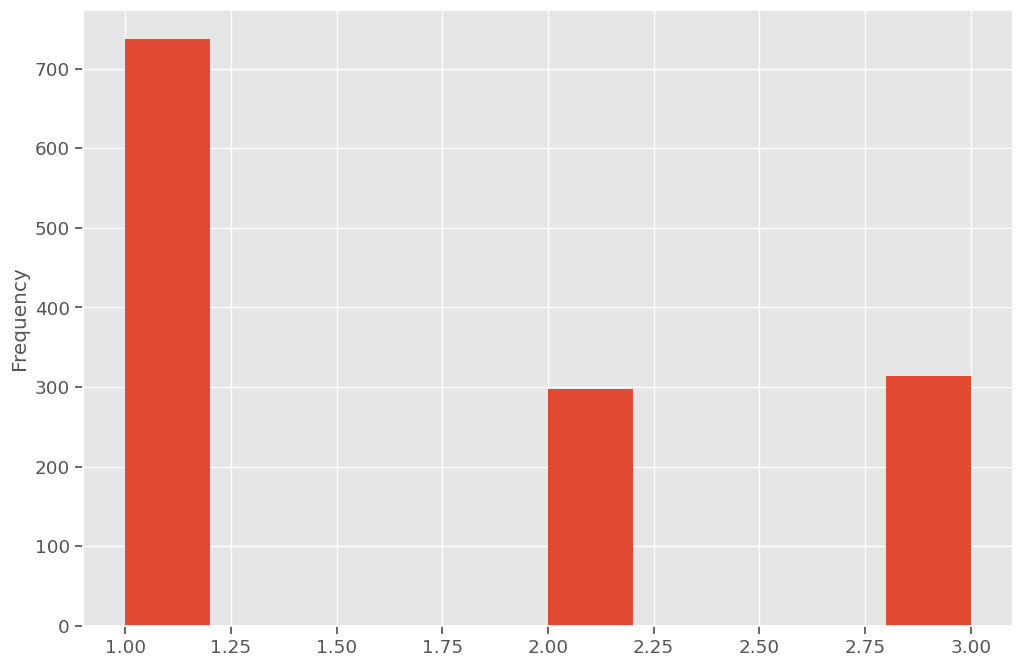

In [58]:
df_cleaned.groupby("nome")["nome"].count().sort_values(ascending=False).plot(
    kind="hist"
)


#### A partir da coluna `INSTITUICAO_ENSINO_ALUNO` é gerada uma nova coluna `CATEGORIA_INSTITUICAO`

In [59]:
def categorizar_instituicao(instituicao):
    if pd.isna(instituicao):
        return None
    elif instituicao == "Escola Pública":
        return "Escola Pública"
    elif instituicao in ["FIAP", "UNISA", "Estácio"]:
        return "Ensino Superior Privado"
    else:
        return "Escolas Privadas"


# Criar nova coluna com as categorias
df_cleaned["categoria_instituicao"] = df_cleaned["instituicao_ensino_aluno"].apply(
    categorizar_instituicao
)

# Verificar o resultado
print(df_cleaned["categoria_instituicao"].value_counts())

# Se quiser ver a distribuição percentual
print("\nDistribuição percentual por categoria de instituição:")
print(df_cleaned["categoria_instituicao"].value_counts(normalize=True) * 100)

# Para verificar se a categorização está correta (tabulação cruzada)
print(
    pd.crosstab(
        df_cleaned["instituicao_ensino_aluno"], df_cleaned["categoria_instituicao"]
    )
)


categoria_instituicao
Escola Pública             1153
Escolas Privadas            234
Ensino Superior Privado      24
Name: count, dtype: int64

Distribuição percentual por categoria de instituição:
categoria_instituicao
Escola Pública             81.715096
Escolas Privadas           16.583983
Ensino Superior Privado     1.700921
Name: proportion, dtype: float64
categoria_instituicao     Ensino Superior Privado  Escola Pública  \
instituicao_ensino_aluno                                            
Einstein                                        0               0   
Escola JP II                                    0               0   
Escola João Paulo II                            0               0   
Escola Pública                                  0            1153   
Estácio                                         3               0   
FIAP                                           11               0   
Rede Decisão                                    0               0   
Rede Decisão/U

#### Corrige a coluna `PEDRA`

In [60]:
def categorizar_pedra(pedra):
    if pd.isna(pedra):
        return None
    else:
        return pedra


df_cleaned["categoria_pedra"] = df_cleaned["pedra"].apply(categorizar_pedra)

# Verificar o resultado
print(df_cleaned["categoria_pedra"].value_counts())

# Se quiser ver a distribuição percentual
print("\nDistribuição percentual por categoria de pedra:")
print(df_cleaned["categoria_pedra"].value_counts(normalize=True) * 100)

# Para verificar se a categorização está correta (tabulação cruzada)
print(pd.crosstab(df_cleaned["pedra"], df_cleaned["categoria_pedra"]))


categoria_pedra
Ametista    979
Ágata       599
Quartzo     372
Topázio     323
Name: count, dtype: int64

Distribuição percentual por categoria de pedra:
categoria_pedra
Ametista    43.070832
Ágata       26.352838
Quartzo     16.366036
Topázio     14.210295
Name: proportion, dtype: float64
categoria_pedra  Ametista  Quartzo  Topázio  Ágata
pedra                                             
Ametista              979        0        0      0
Quartzo                 0      372        0      0
Topázio                 0        0      323      0
Ágata                   0        0        0    599


#### Criar a nova coluna `CATEGORIA_DEFASAGEM` a partir de `DEFASAGEM` para melhor balancear os dados 

In [61]:
def categorizar_defasagem(defasagem):
    if pd.isna(defasagem):
        return None
    elif defasagem >= 0:
        return ">=0.0"
    elif defasagem == -1:
        return "-1.0"
    else:
        return "<=-2.0"


# Converter a coluna DEFASAGEM para numérica, caso não esteja
df_cleaned["defasagem"] = pd.to_numeric(df_cleaned["defasagem"], errors="coerce")

# Criar nova coluna com as categorias
df_cleaned["categoria_defasagem"] = df_cleaned["defasagem"].apply(categorizar_defasagem)

# Verificar o resultado
print("Contagem por categoria de defasagem:")
print(df_cleaned["categoria_defasagem"].value_counts())

# Se quiser ver a distribuição percentual
print("\nDistribuição percentual por categoria de defasagem:")
print(df_cleaned["categoria_defasagem"].value_counts(normalize=True) * 100)

# Para verificar se a categorização está correta, você pode fazer uma tabulação cruzada
print("\nTabulação cruzada de DEFASAGEM vs CATEGORIA_DEFASAGEM:")
print(pd.crosstab(df_cleaned["defasagem"], df_cleaned["categoria_defasagem"]))


Contagem por categoria de defasagem:
categoria_defasagem
-1.0      317
>=0.0     265
<=-2.0    102
Name: count, dtype: int64

Distribuição percentual por categoria de defasagem:
categoria_defasagem
-1.0      46.345029
>=0.0     38.742690
<=-2.0    14.912281
Name: proportion, dtype: float64

Tabulação cruzada de DEFASAGEM vs CATEGORIA_DEFASAGEM:
categoria_defasagem  -1.0  <=-2.0  >=0.0
defasagem                               
-4.0                    0       2      0
-3.0                    0       8      0
-2.0                    0      92      0
-1.0                  317       0      0
 0.0                    0       0    248
 1.0                    0       0     16
 3.0                    0       0      1


#### Cria a coluna `CATEGORIA_BOLSISTA` a partir da coluna `BOLSISTA` para fins de padronização e melhor representação nos gráficos

In [62]:
def categorizar_bolsista(bolsista):
    if pd.isna(bolsista):
        return None
    elif bolsista == 1.0:
        return "Sim"
    else:
        return "Não"


df_cleaned["categoria_bolsista"] = df_cleaned["bolsista"].apply(categorizar_bolsista)

# Verificar o resultado
print("Contagem por categoria de bolsista:")
print(df_cleaned["categoria_bolsista"].value_counts())

# Se quiser ver a distribuição percentual
print("\nDistribuição percentual por categoria de defasagem:")
print(df_cleaned["categoria_bolsista"].value_counts(normalize=True) * 100)

# Para verificar se a categorização está correta, você pode fazer uma tabulação cruzada
print("\nTabulação cruzada de BOLSISTA vs CATEGORIA_BOLSISTA:")
print(pd.crosstab(df_cleaned["bolsista"], df_cleaned["categoria_bolsista"]))


Contagem por categoria de bolsista:
categoria_bolsista
Não    754
Sim    108
Name: count, dtype: int64

Distribuição percentual por categoria de defasagem:
categoria_bolsista
Não    87.470998
Sim    12.529002
Name: proportion, dtype: float64

Tabulação cruzada de BOLSISTA vs CATEGORIA_BOLSISTA:
categoria_bolsista  Não  Sim
bolsista                    
0.0                 754    0
1.0                   0  108


#### Visão dos dados até o momento

Existe uma quantidade substancial de dados ausentes `NA` (e também `"ND"`) em todas as colunas:

In [63]:
print(f"Total de linhas: {len(df_cleaned)}")
pd.DataFrame(
    {
        "Total": df_cleaned.isnull().sum(),
        "Percentual": df_cleaned.isnull().sum() / len(df_cleaned) * 100,
    }
)


Total de linhas: 2273


,Total,Percentual
id,0,0.000000
ano,0,0.000000
nome,0,0.000000
instituicao_ensino_aluno,862,37.923449
idade_aluno,1546,68.015838
anos_pm,1546,68.015838
ponto_virada,26,1.143863
inde,0,0.000000
pedra,0,0.000000
destaque_ieg,684,30.092389


Existe uma quantidade substancial de dados ausentes `NA` (e também `"ND"`) em todas as colunas:

## Gráficos

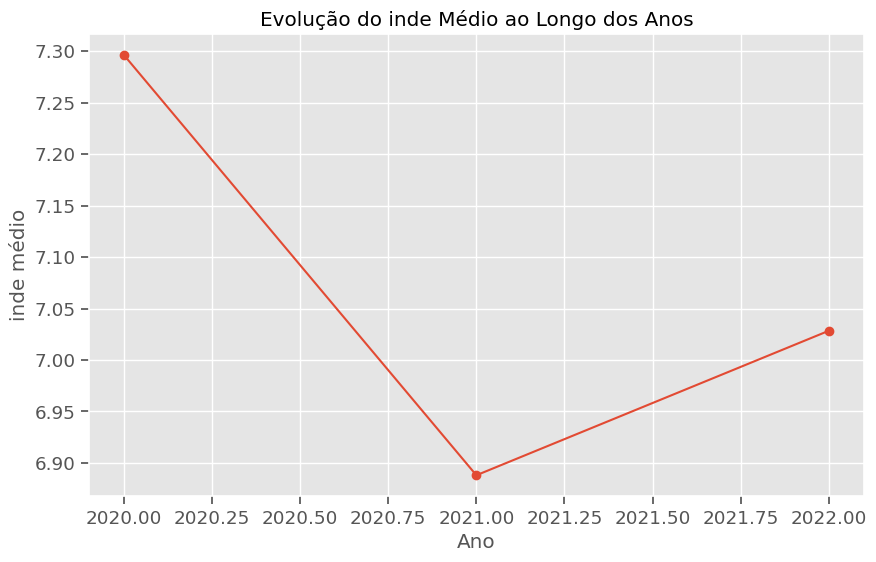

In [64]:
# Evolução do INDE ao longo dos anos
inde_by_year = df_cleaned.groupby("ano")["inde"].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(inde_by_year["ano"], inde_by_year["inde"], marker="o")
plt.title("Evolução do inde Médio ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("inde médio")
plt.grid(True)
plt.show()


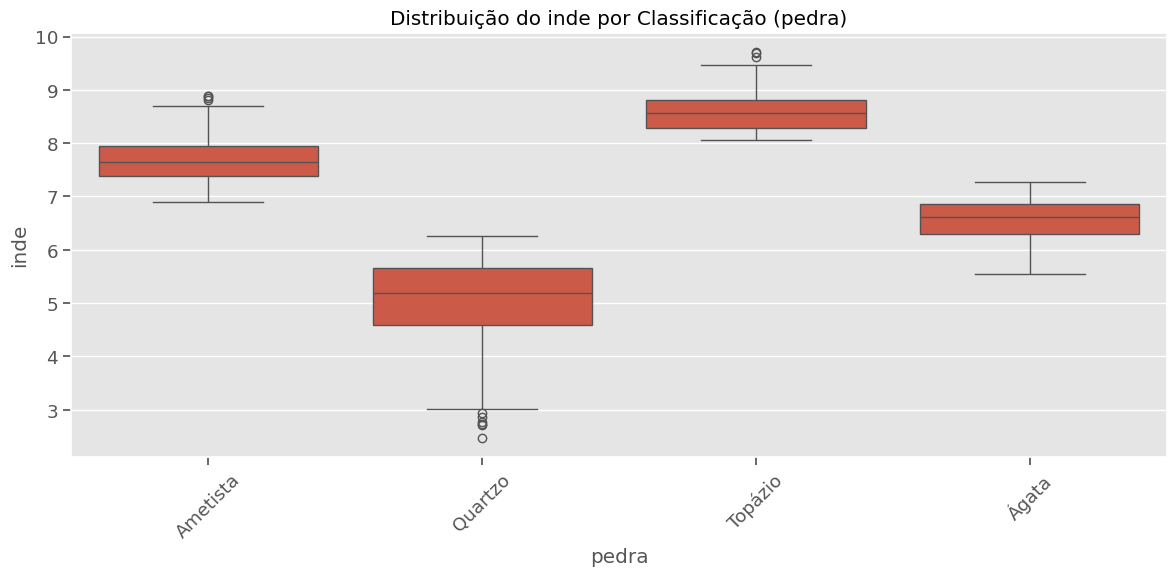

In [65]:
# Criando o boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="pedra", y="inde", data=df_cleaned)
plt.title("Distribuição do inde por Classificação (pedra)")
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta o layout para evitar cortes nos rótulos
plt.show()


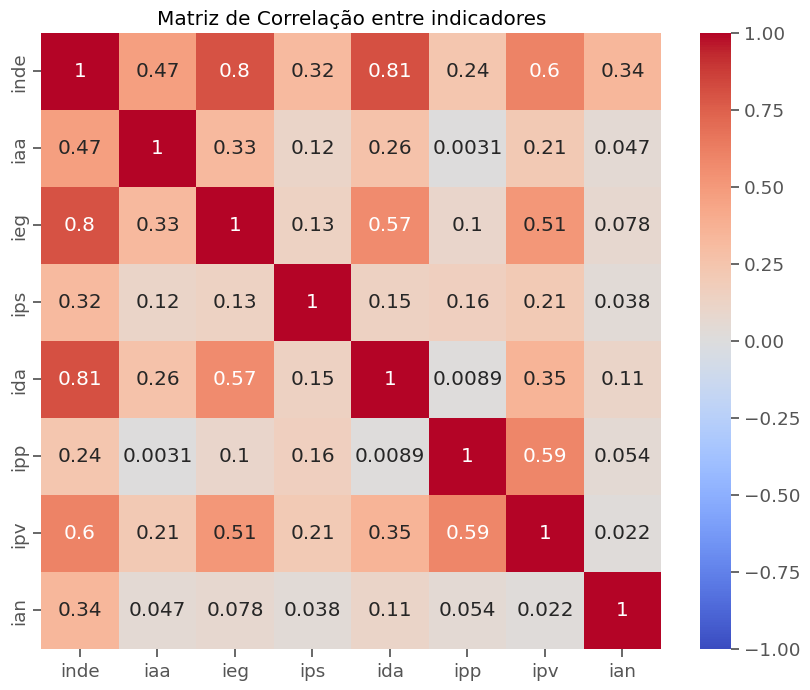

In [66]:
# Heatmap de correlação entre variáveis numéricas
numeric_vars = ["inde", "iaa", "ieg", "ips", "ida", "ipp", "ipv", "ian"]
corr_matrix = df_cleaned[numeric_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0)
plt.title("Matriz de Correlação entre indicadores")
plt.show()


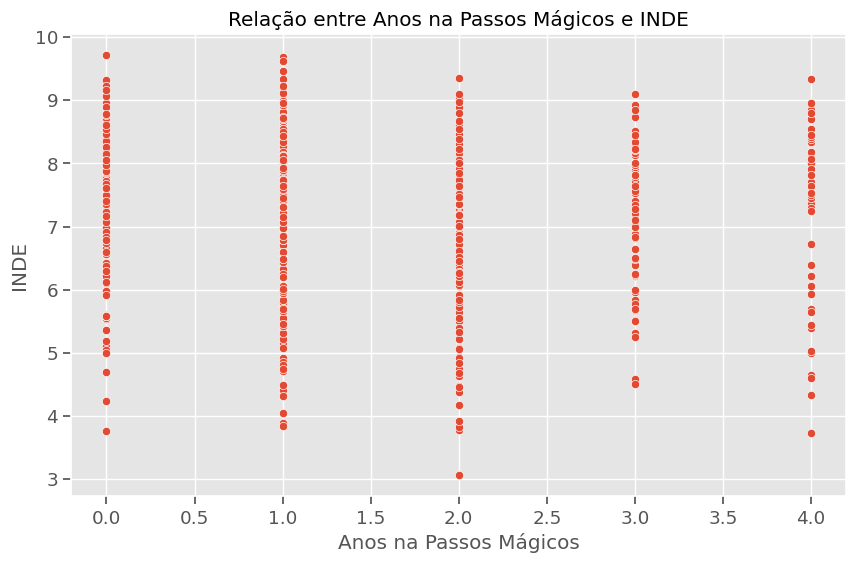

In [67]:
# Análise da relação entre ANOS_PM e INDE
plt.figure(figsize=(10, 6))
sns.scatterplot(x="anos_pm", y="inde", data=df_cleaned)
plt.title("Relação entre Anos na Passos Mágicos e INDE")
plt.xlabel("Anos na Passos Mágicos")
plt.ylabel("INDE")
plt.show()


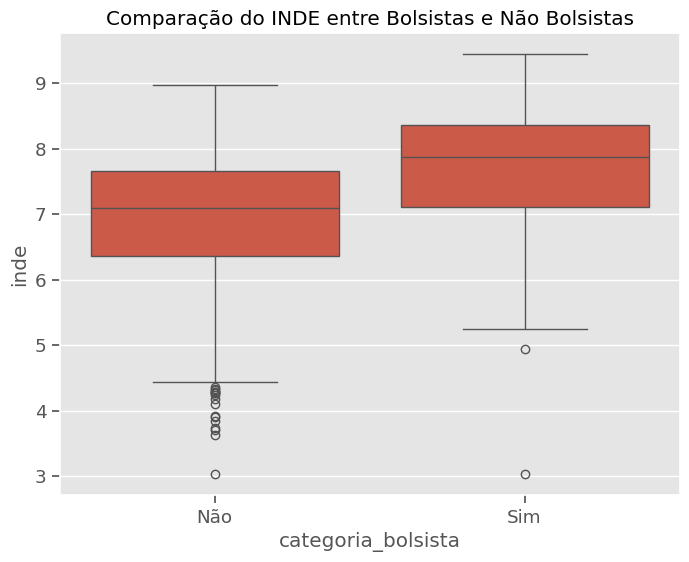

In [68]:
# Comparação do INDE entre bolsistas e não bolsistas
plt.figure(figsize=(8, 6))
sns.boxplot(x="categoria_bolsista", y="inde", data=df_cleaned)
plt.title("Comparação do INDE entre Bolsistas e Não Bolsistas")
plt.show()


In [69]:
# Teste t para comparar INDE entre bolsistas e não bolsistas
bolsistas = df_cleaned[df_cleaned["bolsista"] == 1]["inde"]
nao_bolsistas = df_cleaned[df_cleaned["bolsista"] == 0]["inde"]
t_stat, p_value = stats.ttest_ind(bolsistas, nao_bolsistas)
print(f"Resultado do teste t para INDE entre bolsistas e não bolsistas:")
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.4f}")


Resultado do teste t para INDE entre bolsistas e não bolsistas:
t-statistic: 7.47
p-value: 0.0000


p < 0.05: "Há uma diferença estatisticamente significativa no INDE entre bolsistas e não bolsistas. Com base na estatística t (positiva), podemos concluir que os bolsistas têm um INDE médio significativamente maior que os não bolsistas."

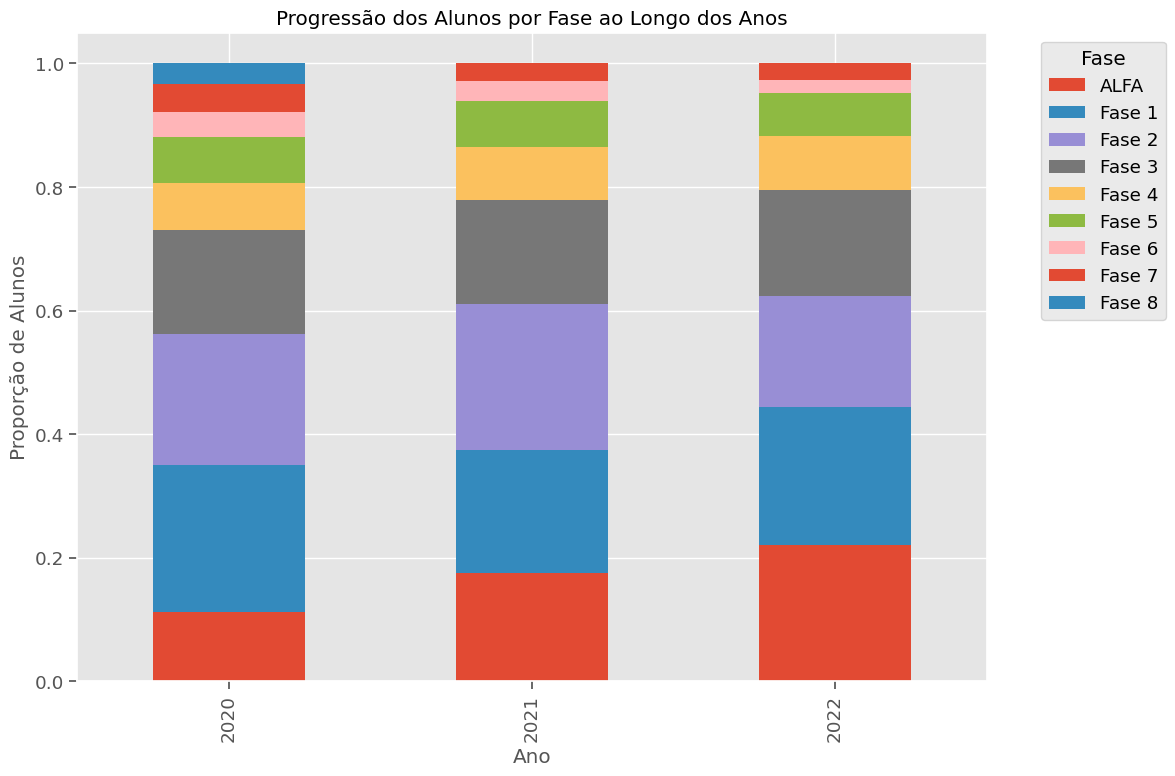

In [70]:
# Análise da progressão dos alunos
progression = df_cleaned.groupby("ano")["fase"].value_counts(normalize=True).unstack()
progression.plot(kind="bar", stacked=True)
plt.title("Progressão dos Alunos por Fase ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Proporção de Alunos")
plt.legend(title="Fase", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


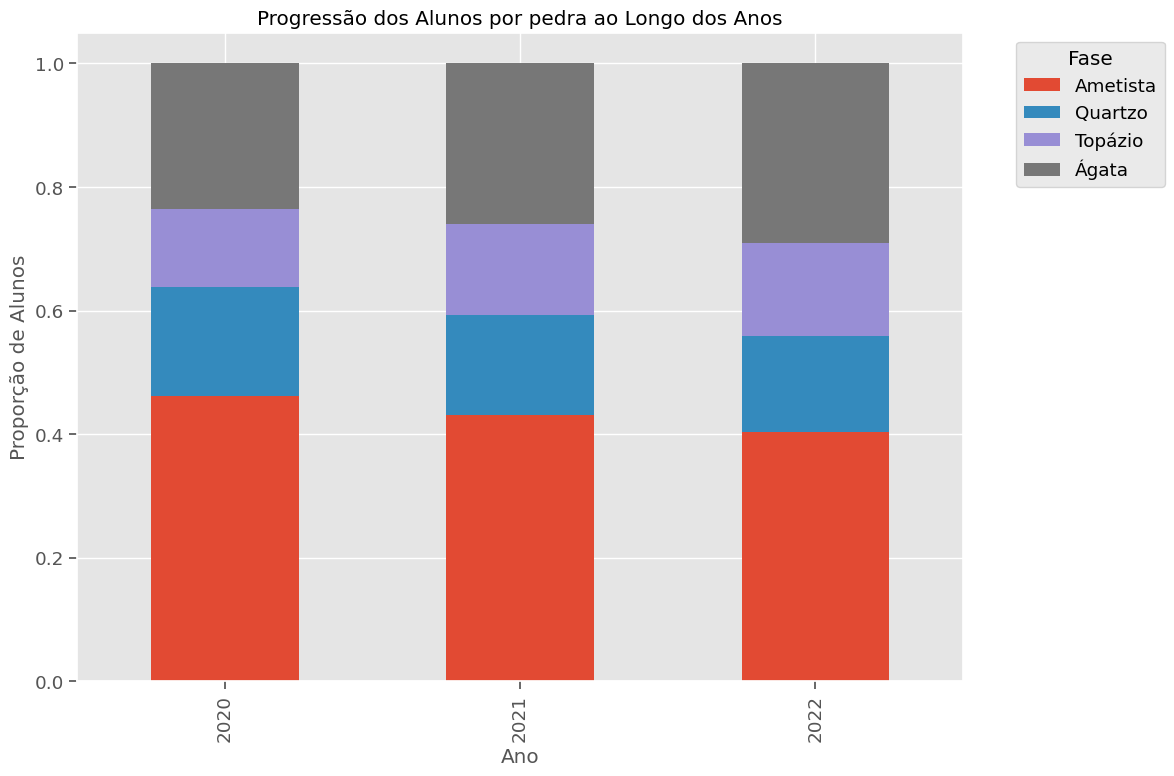

In [71]:
# Análise da progressão dos alunos
progression = df_cleaned.groupby("ano")["pedra"].value_counts(normalize=True).unstack()
progression.plot(kind="bar", stacked=True)
plt.title("Progressão dos Alunos por pedra ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Proporção de Alunos")
plt.legend(title="Fase", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [72]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2273 entries, 0 to 2272
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        2273 non-null   int64   
 1   ano                       2273 non-null   int64   
 2   nome                      2273 non-null   string  
 3   instituicao_ensino_aluno  1411 non-null   object  
 4   idade_aluno               727 non-null    Int64   
 5   anos_pm                   727 non-null    Int64   
 6   ponto_virada              2247 non-null   float64 
 7   inde                      2273 non-null   float64 
 8   pedra                     2273 non-null   category
 9   destaque_ieg              1589 non-null   string  
 10  destaque_ida              1589 non-null   string  
 11  destaque_ipv              1565 non-null   string  
 12  iaa                       2273 non-null   float64 
 13  ieg                       2273 non-null   float6

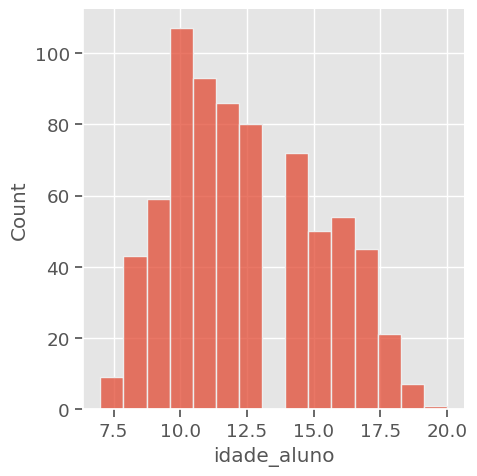

In [73]:
ax = sns.displot(df_cleaned["idade_aluno"])


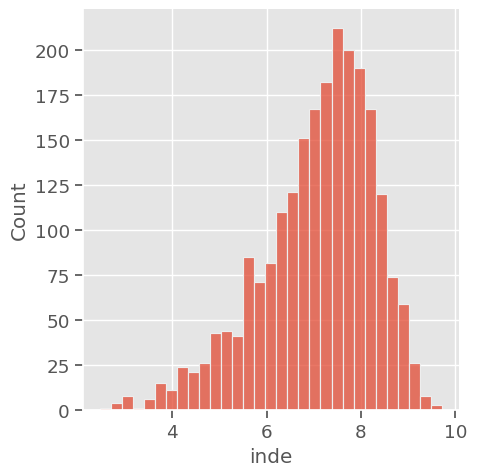

In [74]:
ax = sns.displot(df_cleaned["inde"])


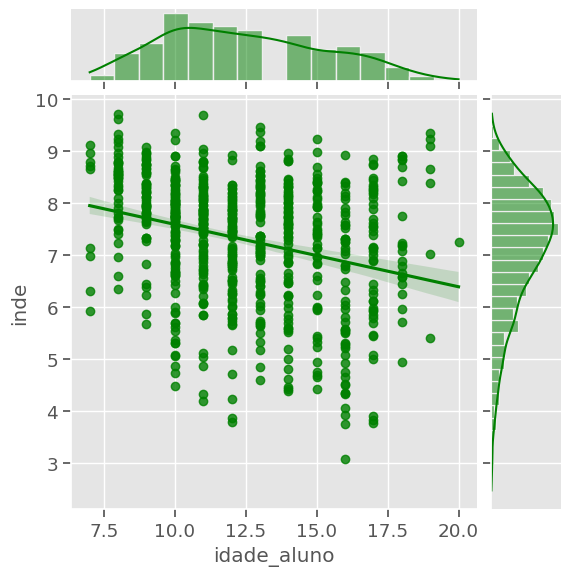

In [75]:
from seaborn import jointplot


new_df = df_cleaned.copy()
jointplot(x="idade_aluno", y="inde", data=new_df, kind="reg", color="green")


## Feature Engineering

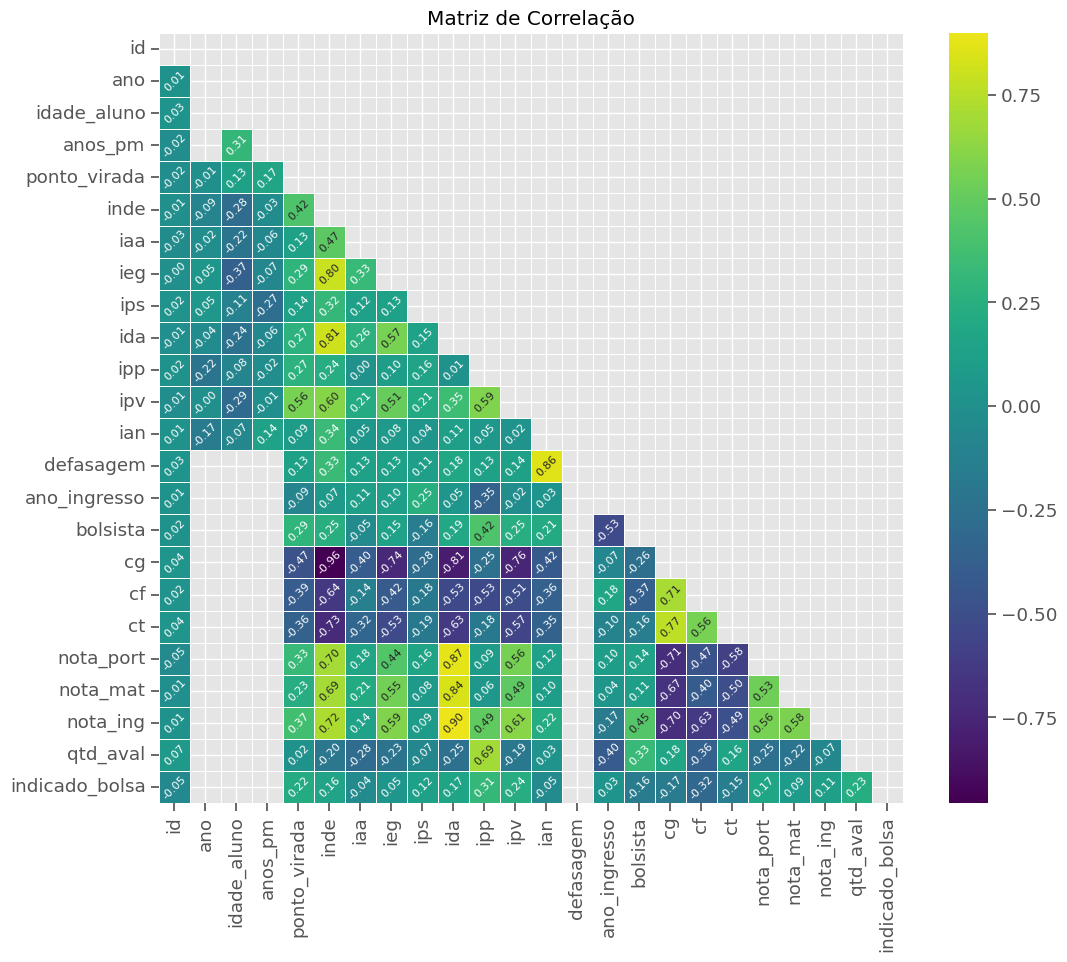

In [76]:
numeric_vars = df_cleaned.select_dtypes(include=["int64", "float64"]).columns.tolist()
df_numerical = df_cleaned[numeric_vars].copy()
corr_matrix = df_numerical.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap="viridis",
    center=0,
    annot_kws={"size": 8, "rotation": 45},
    fmt=".2f",
    linewidths=0.5,
)
# Adicionar um título (opcional)
plt.title("Matriz de Correlação")

# Mostrar o gráfico
plt.show()


### Tratamento de dados categóricos

In [77]:
import category_encoders as ce


# select non numerical columns
df_non_numerical = df_cleaned[
    df_cleaned.select_dtypes(exclude=["int64", "float64"]).columns.tolist()
]

df_non_numerical.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2273 entries, 0 to 2272
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   nome                      2273 non-null   string  
 1   instituicao_ensino_aluno  1411 non-null   object  
 2   pedra                     2273 non-null   category
 3   destaque_ieg              1589 non-null   string  
 4   destaque_ida              1589 non-null   string  
 5   destaque_ipv              1565 non-null   string  
 6   fase                      2273 non-null   object  
 7   turma                     2273 non-null   object  
 8   sinalizador_ingressante   684 non-null    category
 9   rec_ava_1                 1546 non-null   category
 10  rec_ava_2                 1546 non-null   object  
 11  rec_ava_3                 1310 non-null   object  
 12  rec_ava_4                 969 non-null    object  
 13  fase_ideal                1544 non-null   catego

In [78]:
categorical_vars = df_non_numerical.columns.tolist()
for var in categorical_vars:
    if var in df_non_numerical.columns:
        print(f"\nContagem para {var}:")
        print(df_non_numerical[var].value_counts().sort_values())



Contagem para nome:
nome
ALUNO-684     1
ALUNO-987     1
ALUNO-977     1
ALUNO-972     1
ALUNO-160     1
             ..
ALUNO-866     3
ALUNO-1174    3
ALUNO-602     3
ALUNO-586     3
ALUNO-1251    3
Name: count, Length: 1348, dtype: Int64

Contagem para instituicao_ensino_aluno:
instituicao_ensino_aluno
Einstein                   2
Escola João Paulo II       2
Escola JP II               2
Estácio                    3
UNISA                     10
FIAP                      11
Rede Decisão/União       101
Rede Decisão             127
Escola Pública          1153
Name: count, dtype: int64

Contagem para pedra:
pedra
Topázio     323
Quartzo     372
Ágata       599
Ametista    979
Name: count, dtype: int64

Contagem para destaque_ieg:
destaque_ieg
Seu destaque em 2020: O seu bom engajamento nas ações de voluntariado.              12
Ponto a melhorar em 2021: Melhorar o seu engajamento nas ações de voluntariado.     12
Ponto a melhorar em 2021: Melhorar a sua entrega de lições de casa.    

#### Compreensão das colunas: destaque_ida, destaque_ipv, rec_ava_1, rec_ava_2, rec_ava_3, rec_ava_4 por meio de NLP 